In [14]:
import sys
sys.path = ['/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages'] + sys.path
import gwpy
from gwpy.timeseries import TimeSeries
from matplotlib import pyplot as plt
%matplotlib inline
import numpy
import pylab
import pandas as pd
import seaborn as sns


In [9]:
MDC_PATH = "/cvmfs/et-gw.osgstorage.org/et-gw/PUBLIC/MDC1/data"
DATASETS = ['E0','E1','E2','E3','C1','C2']
CHANNELS = {n : f'{n}:STRAIN' for n in DATASETS}

In [10]:

e0 = TimeSeries.read(MDC_PATH+'/E1/E-E1_STRAIN_DATA-1000000000-2048.gwf', 'E1:STRAIN')
# The TimeSeries object contains various useful metadata
print(e0[1:10])

TimeSeries([-5.54284896e-23,  8.72894580e-23, -1.52215950e-22,
             1.93370972e-22, -1.56591158e-22,  2.12791581e-22,
            -7.75441870e-23, -5.23293157e-23, -7.15922186e-23]
           unit: strain,
           t0: 1000000000.0001221 s,
           dt: 0.0001220703125 s,
           name: E1:STRAIN,
           channel: E1:STRAIN)


In [12]:
signals = pd.read_csv('../metadata/list_etmdc1_snr.txt', sep=' ')

There are 6767 signals with SNR>15.


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


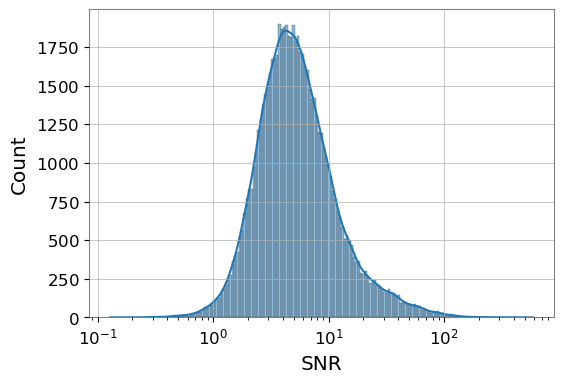

In [13]:
# Plot distribution of SNRs
print(f'There are {sum(signals["SNR"]>15)} signals with SNR>15.')
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
sns.histplot(signals['SNR'], log_scale=(True,False), kde=True, ax=ax)
plt.show()


In [19]:
! pip install -q 'pycbc' --user


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [20]:
from pycbc.waveform import get_td_waveform

# the "approximant" (jargon for parameterized waveform family).
# IMRPhenomD(a phenomenological Inspiral–Merger–Ringdown wafeform model) is defined in the frequency domain, but we'll get it in the time domain (td).
# It runs fast, but it doesn't include effects such as non-aligned component spin, or higher order modes.
apx = 'IMRPhenomD'

In [32]:
sample_rate=8192
 
hp1, _ = get_td_waveform(approximant=apx,
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/sample_rate,
                         f_lower=25)

In [33]:
hp1 = hp1 / max(numpy.correlate(hp1, hp1, mode='full'))**0.5

In [34]:
import lal
def read_without_warnings(cachefile, channel, **kwargs):
    """Reads cache file while suppressing spurious LAL warnings.
    Wraps gwpy.timeseries.TimeSeries.read

    Args:
        cachefile (str): path to cache file
        channel (str): Channel name
        **kwargs: additional arguments passed to TimeSeries.read
    """
    prev_level = lal.GetDebugLevel()
    lal.ClobberDebugLevel(0)
    result = TimeSeries.read(cachefile, channel, **kwargs)
    lal.ClobberDebugLevel(prev_level)
    return result

def get_strain(tc, t_before = 4, t_after = 1):
    start_time = tc - t_before
    end_time = tc + t_after
    h = read_without_warnings('../caches/E1.lcf','E1:STRAIN',start=start_time, end=end_time)
    return h
 

In [37]:
tc=1000604258.71989
h=get_strain(tc, t_before = 16, t_after = 16)

262144


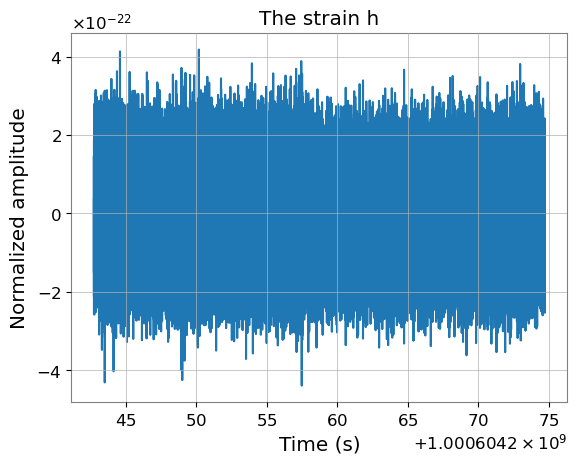

In [42]:
pylab.figure()
pylab.title("The strain h")
pylab.plot( h)
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')
print (len(h))

Text(0, 0.5, 'Normalized amplitude')

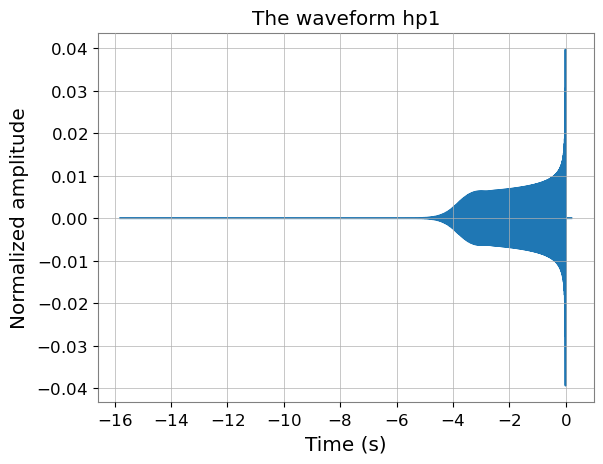

In [35]:
%matplotlib inline
# note that in this figure, the waveform amplitude is of order 1.
# The duration (for frequency above f_lower=25 Hz) is only 3 or 4 seconds long.
# The waveform is "tapered": slowly ramped up from zero to full strength, over the first second or so.
# It is zero-padded at earlier times.
pylab.figure()
pylab.title("The waveform hp1")
pylab.plot(hp1.sample_times, hp1)
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')



In [50]:
# Shfrom pycbc.waveform import get_fd_waveform
from pycbc.waveform import get_fd_waveform
from pycbc.filter import matched_filter
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.catalog import Merger
from pycbc.psd import interpolate, inverse_spectrum_truncation

# Calculate the component mass of each black hole in the detector frame
cmass = 10
# This is a frequency domain waveform generator. It has a very similar syntax to the time domain
# waveform function used in prior tutorials. This function returns both a plus and a cross
# polarization waveform, but we will just use the plus polarization in building our template
# as these are only different by a phase offset in this specific case.
hp, _ = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=cmass, mass2=cmass,
                         f_lower=20.0, delta_f=5)
hp.resize(len(psd[ifo]))

psd=
 # For each observatory use this template to calculate the SNR time series
matched_filter(hp, h, psd, low_frequency_cutoff=20)

NameError: name 'psd' is not defined